This model calculates the Greeks for a simulated option, and then displays how the option's Greeks change as different parameters are varied.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# Black-Scholes Functions
def d1(S0, K, T, r, sigma):
    return (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

def d2(S0, K, T, r, sigma):
    return d1(S0, K, T, r, sigma) - sigma * np.sqrt(T)

In [3]:
# Greeks Calculations
def delta(S0, K, T, r, sigma, option_type='call'):
    if option_type == 'call':
        return norm.cdf(d1(S0, K, T, r, sigma))
    else:
        return -norm.cdf(-d1(S0, K, T, r, sigma))

def gamma(S0, K, T, r, sigma):
    return norm.pdf(d1(S0, K, T, r, sigma)) / (S0 * sigma * np.sqrt(T))

def theta(S0, K, T, r, sigma, option_type='call'):
    term1 = (-S0 * norm.pdf(d1(S0, K, T, r, sigma)) * sigma) / (2 * np.sqrt(T))
    if option_type == 'call':
        term2 = r * K * np.exp(-r * T) * norm.cdf(d2(S0, K, T, r, sigma))
        return term1 - term2
    else:
        term2 = r * K * np.exp(-r * T) * norm.cdf(-d2(S0, K, T, r, sigma))
        return term1 + term2

def vega(S0, K, T, r, sigma):
    return S0 * norm.pdf(d1(S0, K, T, r, sigma)) * np.sqrt(T)

def rho(S0, K, T, r, sigma, option_type='call'):
    if option_type == 'call':
        return T * K * np.exp(-r * T) * norm.cdf(d2(S0, K, T, r, sigma))
    else:
        return -T * K * np.exp(-r * T) * norm.cdf(-d2(S0, K, T, r, sigma))

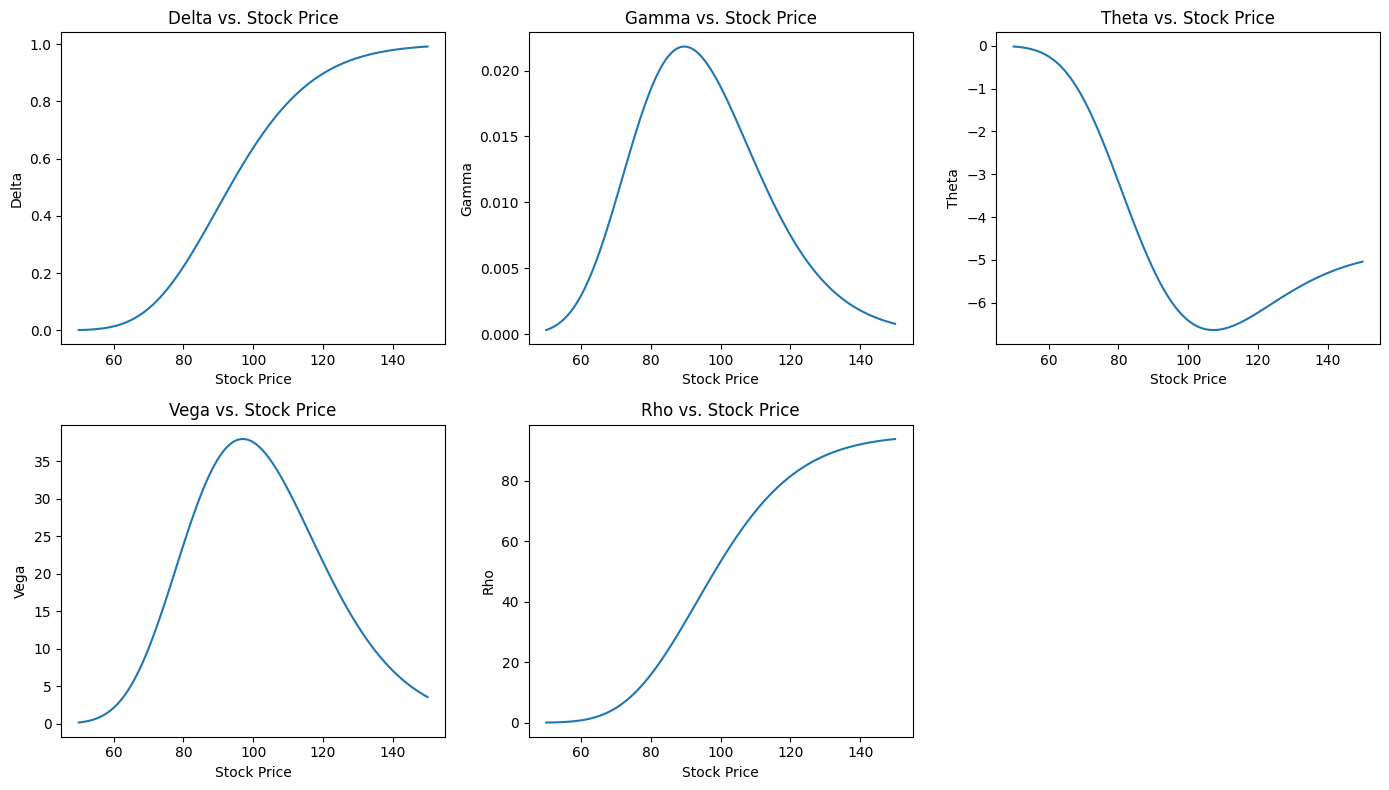

In [21]:
S0_range = np.linspace(50, 150, 100)  # Stock price range from $50 to $150

# Fixed parameters
K = 100   # Strike price
T = 1     # Time to maturity in years
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility

# Calculate Greeks over stock price range
delta_S = [delta(S, K, T, r, sigma) for S in S0_range]
gamma_S = [gamma(S, K, T, r, sigma) for S in S0_range]
theta_S = [theta(S, K, T, r, sigma) for S in S0_range]
vega_S = [vega(S, K, T, r, sigma) for S in S0_range]
rho_S = [rho(S, K, T, r, sigma) for S in S0_range]

# Plotting
plt.figure(figsize=(14, 8))

plt.subplot(2, 3, 1)
plt.plot(S0_range, delta_S, label='Delta')
plt.title('Delta vs. Stock Price')
plt.xlabel('Stock Price')
plt.ylabel('Delta')

plt.subplot(2, 3, 2)
plt.plot(S0_range, gamma_S, label='Gamma')
plt.title('Gamma vs. Stock Price')
plt.xlabel('Stock Price')
plt.ylabel('Gamma')

plt.subplot(2, 3, 3)
plt.plot(S0_range, theta_S, label='Theta')
plt.title('Theta vs. Stock Price')
plt.xlabel('Stock Price')
plt.ylabel('Theta')

plt.subplot(2, 3, 4)
plt.plot(S0_range, vega_S, label='Vega')
plt.title('Vega vs. Stock Price')
plt.xlabel('Stock Price')
plt.ylabel('Vega')

plt.subplot(2, 3, 5)
plt.plot(S0_range, rho_S, label='Rho')
plt.title('Rho vs. Stock Price')
plt.xlabel('Stock Price')
plt.ylabel('Rho')

plt.tight_layout()
plt.show()

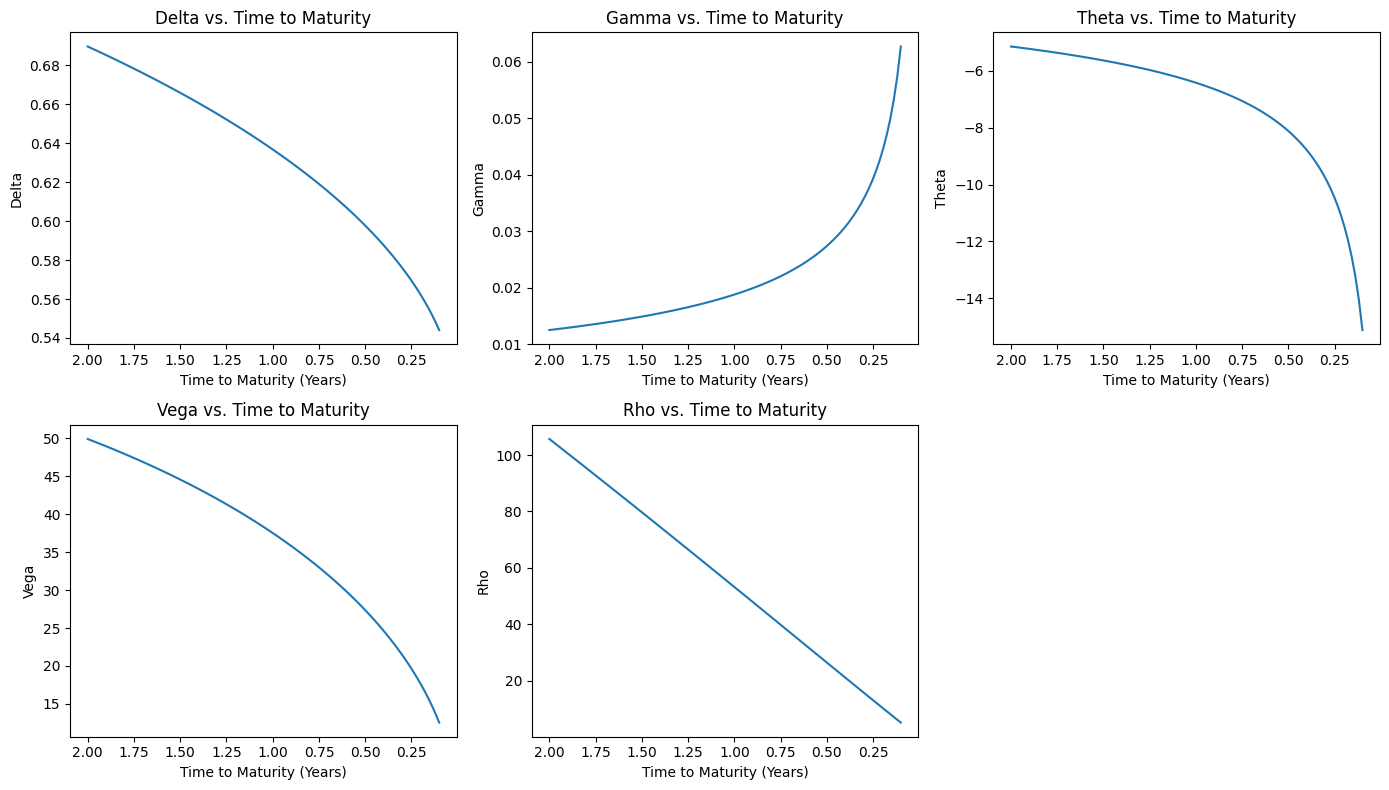

In [19]:
T_range = np.linspace(2, 0.1, 100)  # Time to maturity from 0.1 to 2 years

# Fixed parameters
S0 = 100  # Initial stock price
K = 100   # Strike price
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility

# Calculate Greeks over time to maturity
delta_T = [delta(S0, K, T, r, sigma) for T in T_range]
gamma_T = [gamma(S0, K, T, r, sigma) for T in T_range]
theta_T = [theta(S0, K, T, r, sigma) for T in T_range]
vega_T = [vega(S0, K, T, r, sigma) for T in T_range]
rho_T = [rho(S0, K, T, r, sigma) for T in T_range]

# Plotting
plt.figure(figsize=(14, 8))

plt.subplot(2, 3, 1)
plt.plot(T_range, delta_T, label='Delta')
plt.gca().invert_xaxis()
plt.title('Delta vs. Time to Maturity')
plt.xlabel('Time to Maturity (Years)')
plt.ylabel('Delta')

plt.subplot(2, 3, 2)
plt.plot(T_range, gamma_T, label='Gamma')
plt.gca().invert_xaxis()
plt.title('Gamma vs. Time to Maturity')
plt.xlabel('Time to Maturity (Years)')
plt.ylabel('Gamma')

plt.subplot(2, 3, 3)
plt.plot(T_range, theta_T, label='Theta')
plt.gca().invert_xaxis()
plt.title('Theta vs. Time to Maturity')
plt.xlabel('Time to Maturity (Years)')
plt.ylabel('Theta')

plt.subplot(2, 3, 4)
plt.plot(T_range, vega_T, label='Vega')
plt.gca().invert_xaxis()
plt.title('Vega vs. Time to Maturity')
plt.xlabel('Time to Maturity (Years)')
plt.ylabel('Vega')

plt.subplot(2, 3, 5)
plt.plot(T_range, rho_T, label='Rho')
plt.gca().invert_xaxis()
plt.title('Rho vs. Time to Maturity')
plt.xlabel('Time to Maturity (Years)')
plt.ylabel('Rho')

plt.tight_layout()
plt.show()

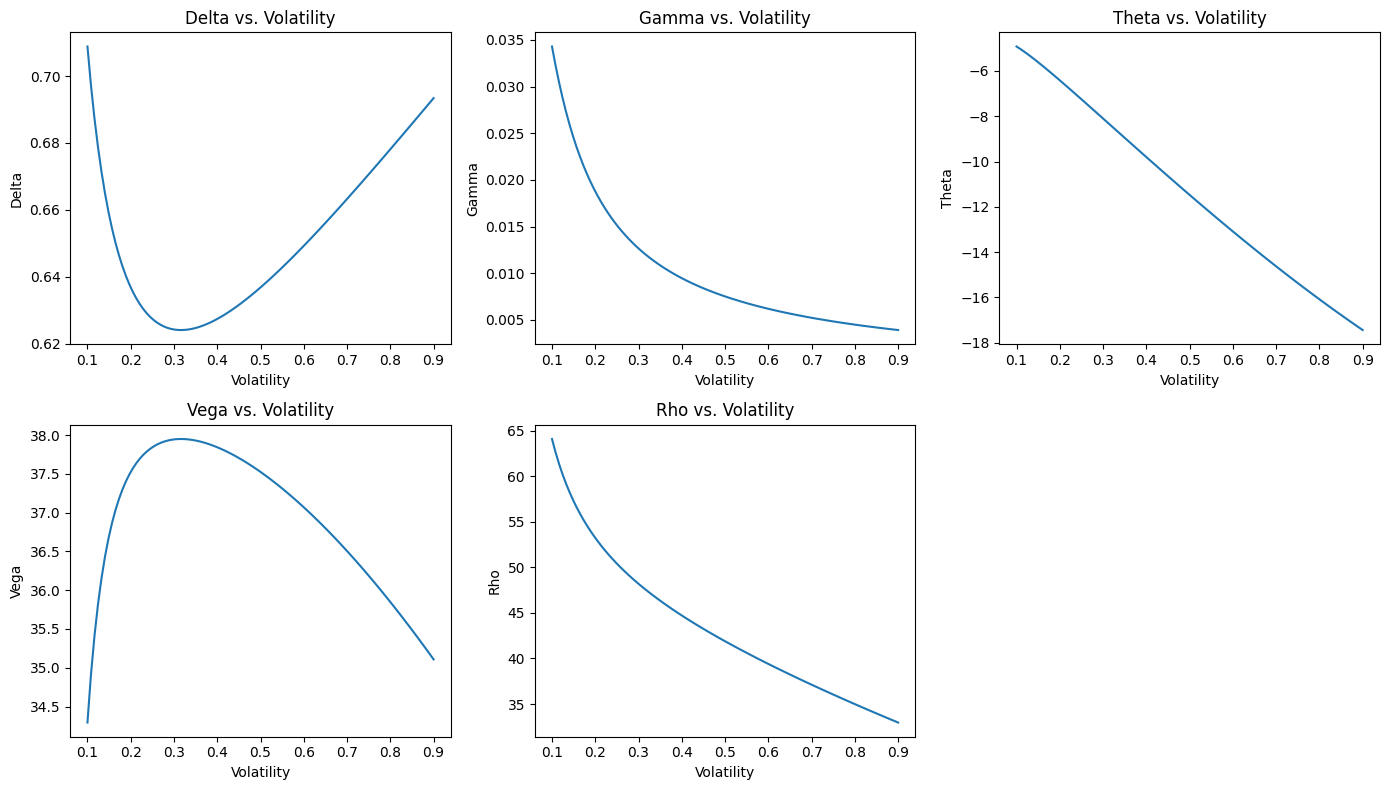

In [17]:
sigma_range = np.linspace(0.1, 0.9, 100)  # Volatility from 10% to 50%

# Fixed parameters
S0 = 100  # Initial stock price
K = 100   # Strike price
T = 1     # Time to maturity in years
r = 0.05  # Risk-free rate

# Calculate Greeks over volatility range
delta_sigma = [delta(S0, K, T, r, sigma) for sigma in sigma_range]
gamma_sigma = [gamma(S0, K, T, r, sigma) for sigma in sigma_range]
theta_sigma = [theta(S0, K, T, r, sigma) for sigma in sigma_range]
vega_sigma = [vega(S0, K, T, r, sigma) for sigma in sigma_range]
rho_sigma = [rho(S0, K, T, r, sigma) for sigma in sigma_range]

# Plotting
plt.figure(figsize=(14, 8))

plt.subplot(2, 3, 1)
plt.plot(sigma_range, delta_sigma, label='Delta')
plt.title('Delta vs. Volatility')
plt.xlabel('Volatility')
plt.ylabel('Delta')

plt.subplot(2, 3, 2)
plt.plot(sigma_range, gamma_sigma, label='Gamma')
plt.title('Gamma vs. Volatility')
plt.xlabel('Volatility')
plt.ylabel('Gamma')

plt.subplot(2, 3, 3)
plt.plot(sigma_range, theta_sigma, label='Theta')
plt.title('Theta vs. Volatility')
plt.xlabel('Volatility')
plt.ylabel('Theta')

plt.subplot(2, 3, 4)
plt.plot(sigma_range, vega_sigma, label='Vega')
plt.title('Vega vs. Volatility')
plt.xlabel('Volatility')
plt.ylabel('Vega')

plt.subplot(2, 3, 5)
plt.plot(sigma_range, rho_sigma, label='Rho')
plt.title('Rho vs. Volatility')
plt.xlabel('Volatility')
plt.ylabel('Rho')

plt.tight_layout()
plt.show()


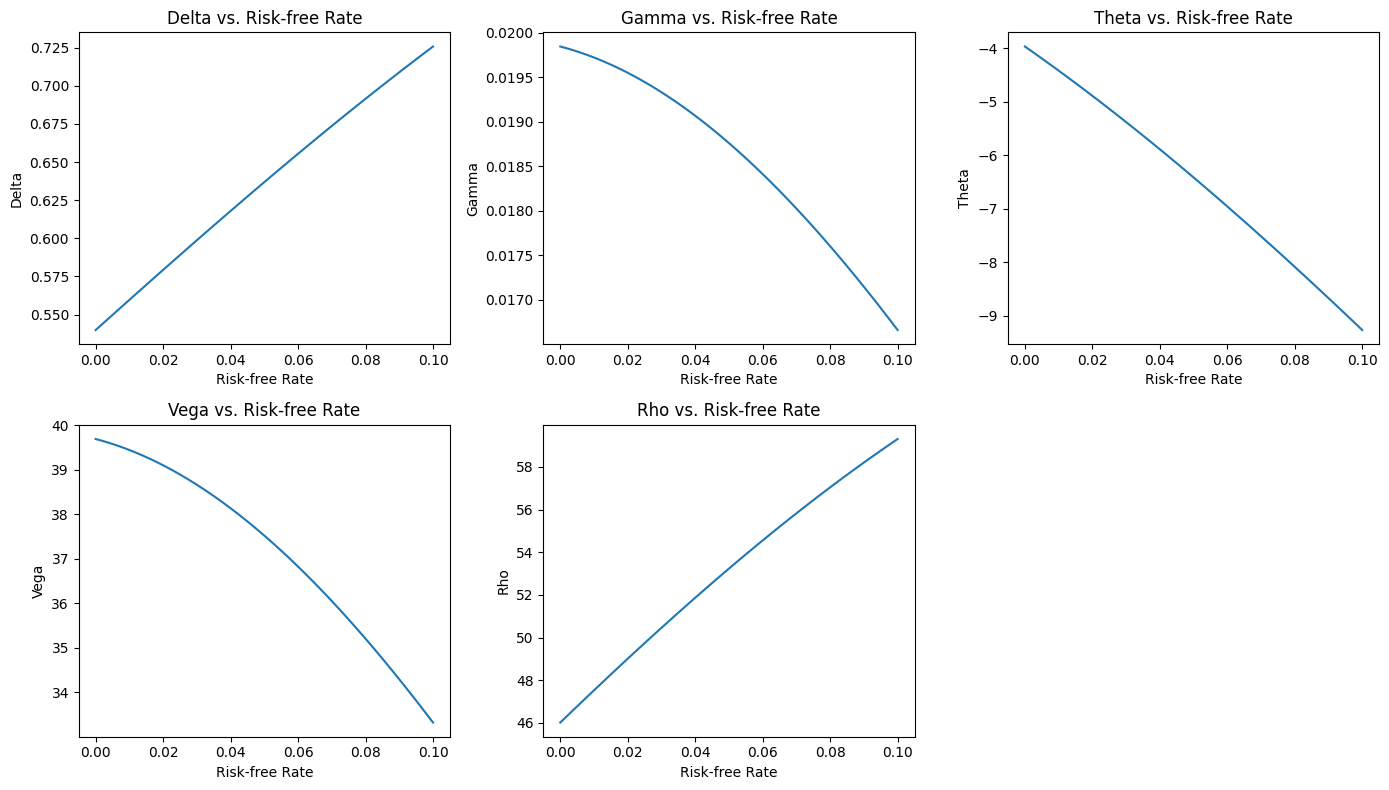

In [18]:
r_range = np.linspace(0, 0.1, 100)  # Risk-free rate from 0% to 10%

# Fixed parameters
S0 = 100  # Initial stock price
K = 100   # Strike price
T = 1     # Time to maturity in years
sigma = 0.2  # Volatility

# Calculate Greeks over risk-free rate range
delta_r = [delta(S0, K, T, r, sigma) for r in r_range]
gamma_r = [gamma(S0, K, T, r, sigma) for r in r_range]
theta_r = [theta(S0, K, T, r, sigma) for r in r_range]
vega_r = [vega(S0, K, T, r, sigma) for r in r_range]
rho_r = [rho(S0, K, T, r, sigma) for r in r_range]

# Plotting
plt.figure(figsize=(14, 8))

plt.subplot(2, 3, 1)
plt.plot(r_range, delta_r, label='Delta')
plt.title('Delta vs. Risk-free Rate')
plt.xlabel('Risk-free Rate')
plt.ylabel('Delta')

plt.subplot(2, 3, 2)
plt.plot(r_range, gamma_r, label='Gamma')
plt.title('Gamma vs. Risk-free Rate')
plt.xlabel('Risk-free Rate')
plt.ylabel('Gamma')

plt.subplot(2, 3, 3)
plt.plot(r_range, theta_r, label='Theta')
plt.title('Theta vs. Risk-free Rate')
plt.xlabel('Risk-free Rate')
plt.ylabel('Theta')

plt.subplot(2, 3, 4)
plt.plot(r_range, vega_r, label='Vega')
plt.title('Vega vs. Risk-free Rate')
plt.xlabel('Risk-free Rate')
plt.ylabel('Vega')

plt.subplot(2, 3, 5)
plt.plot(r_range, rho_r, label='Rho')
plt.title('Rho vs. Risk-free Rate')
plt.xlabel('Risk-free Rate')
plt.ylabel('Rho')

plt.tight_layout()
plt.show()
